In [19]:
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk import stem
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ubersmurf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ubersmurf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ubersmurf/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
data = {
    'text': [
        'Nlp is something',
        'Natural language processing is something',
        np.nan,
        'Data processing is something',
        'Machines learning is something',
        'Artificial intelligence is something',
        np.nan,
        'data processing is something',
        'removing stop words helps in improving model performance',
        'data processing is something'
    ]
}

df = pd.DataFrame(data)  # creating a dataframe from text data
df

,text
0,Nlp is something
1,Natural language processing is something
2,NaN
3,Data processing is something
4,Machines learning is something
5,Artificial intelligence is something
6,NaN
7,data processing is something
8,removing stop words helps in improving model p...
9,data processing is something


In [6]:
df = df.dropna(subset = ['text'])  # delete nan values from column 'text'
df = df.drop_duplicates(subset=['text'])  # delete duplicates from column 'text'
df['text']=df['text'].apply(lambda x: x.lower())  # convert all text to lower case
df

,text
0,nlp is something
1,natural language processing is something
3,data processing is something
4,machines learning is something
5,artificial intelligence is something
7,data processing is something
8,removing stop words helps in improving model p...


In [7]:
stop_words = set(stopwords.words('english'))
def remove_stops(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(remove_stops)
df

,text
0,nlp something
1,natural language processing something
3,data processing something
4,machines learning something
5,artificial intelligence something
7,data processing something
8,removing stop words helps improving model perf...


In [8]:
df['tokens']=df['text'].apply(word_tokenize)
df

,text,tokens
0,nlp something,"[nlp, something]"
1,natural language processing something,"[natural, language, processing, something]"
3,data processing something,"[data, processing, something]"
4,machines learning something,"[machines, learning, something]"
5,artificial intelligence something,"[artificial, intelligence, something]"
7,data processing something,"[data, processing, something]"
8,removing stop words helps improving model perf...,"[removing, stop, words, helps, improving, mode..."


In [9]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized tokens'] = df['tokens'].apply(lemmatize_tokens)
df

,text,tokens,lemmatized tokens
0,nlp something,"[nlp, something]","[nlp, something]"
1,natural language processing something,"[natural, language, processing, something]","[natural, language, processing, something]"
3,data processing something,"[data, processing, something]","[data, processing, something]"
4,machines learning something,"[machines, learning, something]","[machine, learning, something]"
5,artificial intelligence something,"[artificial, intelligence, something]","[artificial, intelligence, something]"
7,data processing something,"[data, processing, something]","[data, processing, something]"
8,removing stop words helps improving model perf...,"[removing, stop, words, helps, improving, mode...","[removing, stop, word, help, improving, model,..."


In [10]:
stammer = PorterStemmer()

def stam_tokens(tokens):
    return [stammer.stem(token) for token in tokens]

df['stammer tokens'] = df['tokens'].apply(stam_tokens)
df

,text,tokens,lemmatized tokens,stammer tokens
0,nlp something,"[nlp, something]","[nlp, something]","[nlp, someth]"
1,natural language processing something,"[natural, language, processing, something]","[natural, language, processing, something]","[natur, languag, process, someth]"
3,data processing something,"[data, processing, something]","[data, processing, something]","[data, process, someth]"
4,machines learning something,"[machines, learning, something]","[machine, learning, something]","[machin, learn, someth]"
5,artificial intelligence something,"[artificial, intelligence, something]","[artificial, intelligence, something]","[artifici, intellig, someth]"
7,data processing something,"[data, processing, something]","[data, processing, something]","[data, process, someth]"
8,removing stop words helps improving model perf...,"[removing, stop, words, helps, improving, mode...","[removing, stop, word, help, improving, model,...","[remov, stop, word, help, improv, model, perform]"


In [11]:
vectorizer = CountVectorizer()
Bag = vectorizer.fit_transform(df['text'])
pd.DataFrame(Bag.toarray(), columns=vectorizer.get_feature_names_out())

,artificial,data,helps,improving,intelligence,language,learning,machines,model,natural,nlp,performance,processing,removing,something,stop,words
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1


In [14]:
tfidf_vectorizer = TfidfVectorizer()
TFIDF = tfidf_vectorizer.fit_transform(df['text'])
pd.DataFrame(TFIDF.toarray(), columns=vectorizer.get_feature_names_out())

,artificial,data,helps,improving,intelligence,language,learning,machines,model,natural,nlp,performance,processing,removing,something,stop,words
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.903271,0.000000,0.000000,0.000000,0.429070,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.60533,0.000000,0.000000,0.000000,0.60533,0.000000,0.000000,0.429500,0.000000,0.287542,0.000000,0.000000
2,0.000000,0.697055,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.595819,0.000000,0.398890,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.670305,0.670305,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.318407,0.000000,0.000000
4,0.670305,0.000000,0.000000,0.000000,0.670305,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.318407,0.000000,0.000000
5,0.000000,0.697055,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.595819,0.000000,0.398890,0.000000,0.000000
6,0.000000,0.000000,0.377964,0.377964,0.000000,0.00000,0.000000,0.000000,0.377964,0.00000,0.000000,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964


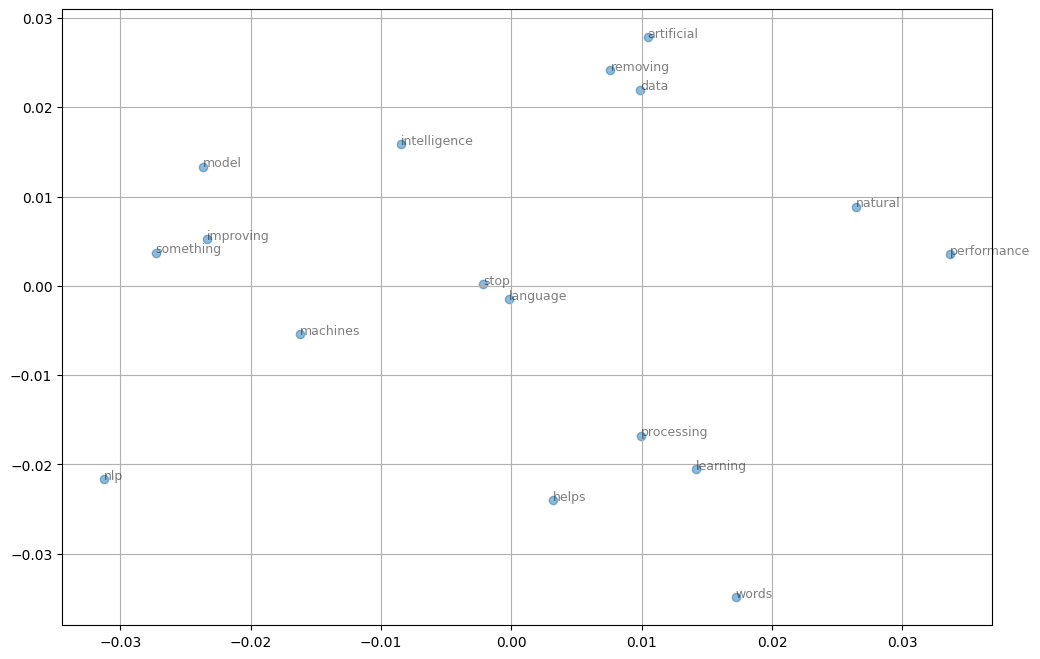

In [ ]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

words = list(word_vectors.key_to_index)

X = word_vectors[words]
pca_model = PCA(n_components=2)
reduced_X = pca_model.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], alpha=0.5)

for i, word in enumerate(words):
    plt.annotate(word, (reduced_X[i, 0], reduced_X[i, 1]), fontsize=9, alpha=0.5)

plt.grid(True)
plt.show()

